# Reconnaissance de digits manuscrits par CNN

## Importation des Bibliothèques 

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm 

## Partie 1 : Base de données, Analyse et Préparation

In [2]:
path_test = os.path.join(".", "DataSet", "testing")

Data_test = []
Label_test = []

# Récursive méthode
# for root, dir_file, file in os.walk(path_test):
#     for f in file:
#         image_path = os.path.join(root,f)
#         Data_test.append(cv2.imread(image_path))

for folder in tqdm(os.listdir(path_test)):
    for file in os.listdir(os.path.join(path_test, folder)):
        image_path = os.path.join(path_test,folder,file)
        Data_test.append(cv2.imread(image_path))
        Label_test.append(int(folder))

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.90s/it]


In [3]:
path_train = os.path.join(".", "DataSet", "training")

Data_train = []
Label_train = []
# for root, dir_file, file in os.walk(path_train):
#    for f in tqdm(file):
#        image_path = os.path.join(root,f)
#        Data_train.append(cv2.imread(image_path))
#        Label_train.append(root.split("/")[-1])

for folder in tqdm(os.listdir(path_train)):
    for file in os.listdir(os.path.join(path_train, folder)):
        image_path = os.path.join(path_train,folder,file)
        Data_train.append(cv2.imread(image_path))
        Label_train.append(int(folder))

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [05:04<00:00, 30.43s/it]


In [4]:
print(f"Train : {len(Data_train)} | Test : {len(Data_test)}")

Train : 60000 | Test : 10000


In [5]:
print(f"Train : {len(Label_train)} | Test : {len(Label_test)}")

Train : 60000 | Test : 10000


## Partie 2 : Architecture CNN sur Tensorflow

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

In [13]:
X_train, X_test = np.array(Data_train)/255, np.array(Data_test)/255
y_train, y_test = np.array(Label_train), np.array(Label_test)

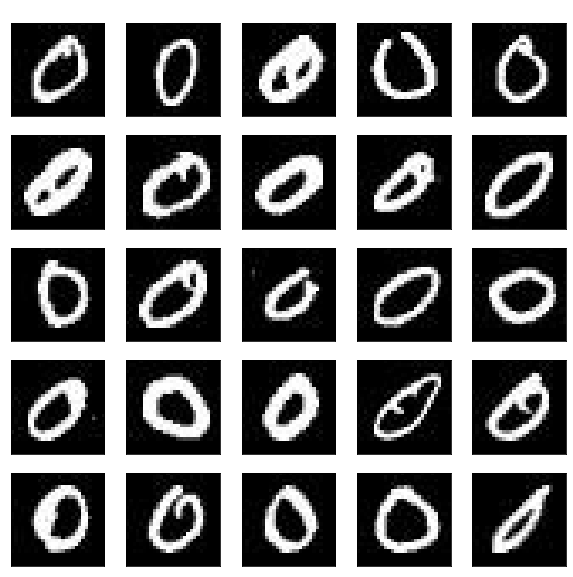

In [14]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.title(str(Label_train[i]), color="w")
plt.show()


In [15]:
image_shape = X_train[0].shape
print(image_shape)

(28, 28, 3)


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=image_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))

# Ajout des couches denses
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10))

# Résumé du model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

## Compilation et entraînement du modèle

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 125s 66ms/step - loss: 0.0829 - accuracy: 0.9752 - val_loss: 0.0505 - val_accuracy: 0.9840
Epoch 2/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0451 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0428 - accuracy: 0.9871 - val_loss: 0.0360 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0356 - val_accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 119s 64ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0358 - val_accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 2334s 1s/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.

## Evaluation du modèle

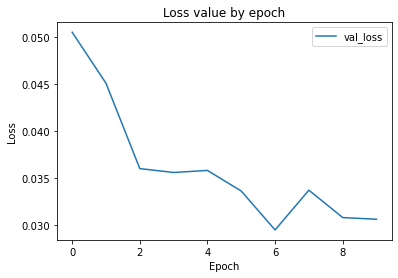

In [19]:
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend(loc = "upper right")
plt.title("Loss value by epoch")

plt.show()

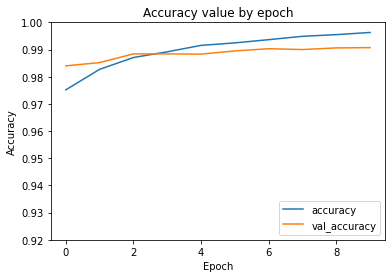

313/313 - 5s - loss: 0.0307 - accuracy: 0.9907 - 5s/epoch - 16ms/step


In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.92, 1])
plt.legend(loc='lower right')
plt.title("Accuracy value by epoch")

plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


In [43]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=-1)

In [44]:
y_pred[2000]

1

In [45]:
confusion_matrix = tf.math.confusion_matrix(
    y_test,
    y_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

In [58]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    0,    0,    2,    1,    2,    0],
       [   0, 1129,    0,    2,    0,    1,    1,    1,    1,    0],
       [   3,    2, 1019,    0,    2,    0,    1,    5,    0,    0],
       [   0,    0,    0, 1005,    0,    3,    0,    1,    1,    0],
       [   0,    0,    1,    0,  973,    0,    0,    0,    2,    6],
       [   2,    0,    0,    4,    0,  885,    1,    0,    0,    0],
       [   2,    3,    0,    0,    1,    2,  949,    0,    1,    0],
       [   0,    2,    2,    1,    0,    0,    0, 1015,    1,    7],
       [   4,    0,    0,    1,    0,    1,    2,    3,  958,    5],
       [   0,    0,    0,    0,    5,    3,    0,    1,    1,  999]])>

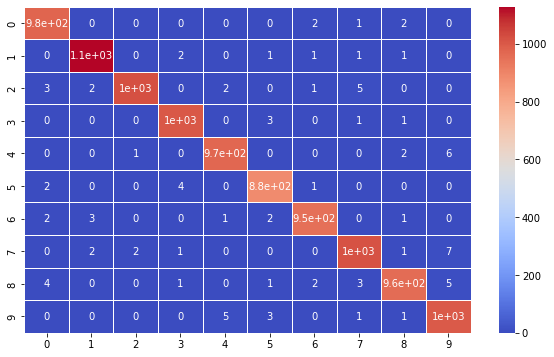

In [51]:
import seaborn as sn

plt.figure(figsize=(10,6))
sn.heatmap(confusion_matrix, annot=True,cmap='coolwarm', linecolor='white', linewidths=1)
plt.title("Matrice de confusion")
plt.show()